# Información del Dataset

Dataset cortesía de MIRBEK TOKTOGARAEV obtenido de [Kaggle](https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market).

# Análisis del Mercado Inmobiliario de Madrid

Este proyecto analiza los datos del mercado inmobiliario de Madrid para predecir los precios de las propiedades utilizando técnicas avanzadas de Machine Learning. El dataset utilizado proviene de Kaggle y contiene información detallada sobre las propiedades listadas en varios portales inmobiliarios de Madrid.

## Importación de Librerías Necesarias

Antes de comenzar, importamos todas las librerías necesarias para nuestro análisis y modelado.
s y modelado.


# Instalando las librerías necesarias para el proyecto

In [75]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.2/99.8 MB 1.8 MB/s eta 0:00:56
    --------------------------------------- 1.9/99.8 MB 11.3 MB/s eta 0:00:09
   - -------------------------------------- 2.9/99.8 MB 13.2 MB/s eta 0:00:08
   -- ------------------------------------- 5.7/99.8 MB 20.3 MB/s eta 0:00:05
   --- ------------------------------------ 7.7/99.8 MB 24.6 MB/s eta 0:00:04
   --- ------------------------------------ 9.6/99.8 MB 25.6 MB/s eta 0:00:04
   ---- ----------------------------------- 10.6/99.8 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 12.4/99.8 MB 43.7 MB/s eta 0:00:02
   ----- ---------------------------------- 14.3/99.8 MB 38.6 MB/s eta 0:00:03

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

## Carga de Datos

Cargamos los datos desde un archivo CSV proporcionado para este análisis.


In [111]:
# Cargamos el dataset de formato CSV desde la ruta
url = "Dataset/houses_Madrid.csv"
data = pd.read_csv(url)

# Visualiza las primeras filas del dataset para verificar que se ha cargado correctamente
print(data.head())

   Unnamed: 0     id                                              title  \
0           0  21742              Piso en venta en calle de Godella, 64   
1           1  21741   Piso en venta en calle de la del Manojo de Rosas   
2           2  21740               Piso en venta en calle del Talco, 68   
3           3  21739               Piso en venta en calle Pedro Jiménez   
4           4  21738  Piso en venta en carretera de Villaverde a Val...   

                subtitle  sq_mt_built  sq_mt_useful  n_rooms  n_bathrooms  \
0  San Cristóbal, Madrid         64.0          60.0        2          1.0   
1    Los Ángeles, Madrid         70.0           NaN        3          1.0   
2     San Andrés, Madrid         94.0          54.0        2          2.0   
3     San Andrés, Madrid         64.0           NaN        2          1.0   
4    Los Rosales, Madrid        108.0          90.0        2          2.0   

   n_floors  sq_mt_allotment  ...  energy_certificate  has_parking  \
0       NaN     

## Exploración de Datos

Realizamos una exploración inicial para entender la estructura y los tipos de datos que contiene nuestro dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

C:\Users\miver\AppData\Local\Temp\ipykernel_23384\3656242371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_sorted.index, y=missing_values_sorted.values, palette='viridis')


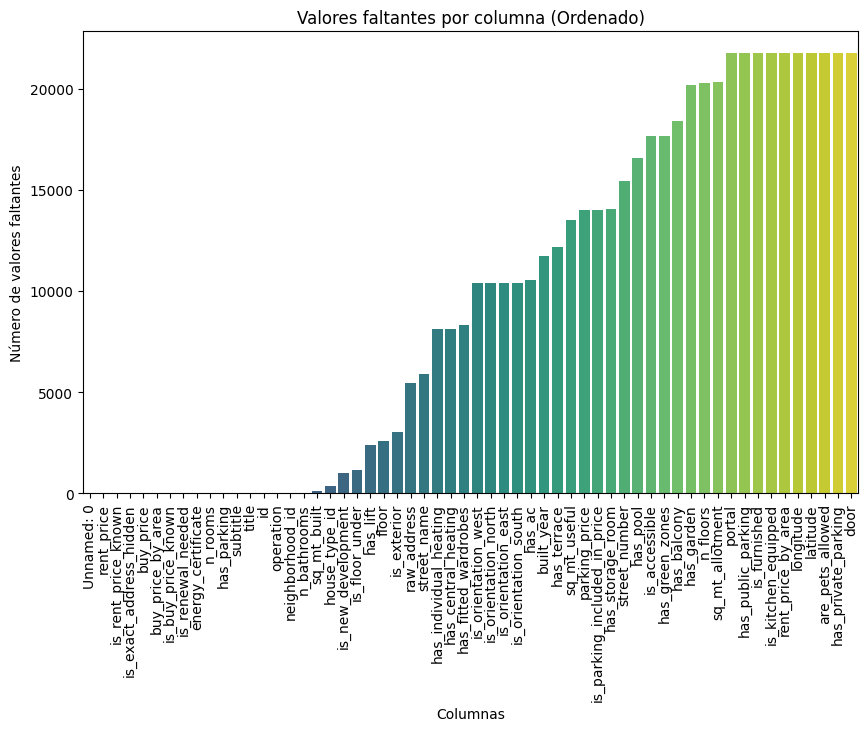

In [113]:
print(data.info())
print(data.describe())

# Visualización de valores faltantes
missing_values = data.isnull().sum()
missing_values_sorted = missing_values.sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_sorted.index, y=missing_values_sorted.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Valores faltantes por columna (Ordenado)')
plt.ylabel('Número de valores faltantes')
plt.xlabel('Columnas')
plt.show()

# Observaciones Generales
**Grandes Cantidades de Valores Nulos:**
Muchas columnas tienen una cantidad significativa de valores nulos. Por ejemplo, las columnas **_latitude_** y **_longitude_** están completamente vacías (21742 valores nulos cada una). Esto sugiere que los datos de ubicación geográfica específica están completamente ausentes, lo que puede ser crítico si la localización es un factor importante para el análisis del precio de las viviendas.

**Datos Parcialmente Completos:**
Columnas como **_sq_mt_useful_** (metros cuadrados útiles) y **_n_floors_** (número de pisos) también tienen una gran cantidad de valores faltantes (13514 y 20305, respectivamente). Estos son datos importantes porque el tamaño útil de una propiedad y la cantidad de pisos pueden influir significativamente en su valor de mercado.

**Datos con Posibles Errores de Entrada:** 
La columna **_built_year_** (año de construcción) tiene valores que parecen erróneos, con un máximo de 8170, lo cual es claramente un error de entrada ya que estamos en el año 2024.

# Problemas y Retos
**Análisis Limitado:** 
La falta de datos completos puede limitar la capacidad de realizar análisis detallados y precisos. Por ejemplo, la falta de datos de ubicación (**_latitude_** y **_longitude_**) impide análisis geográficos que podrían ser cruciales para entender las dinámicas del mercado inmobiliario en Madrid.

**Influencia en Modelos de Machine Learning:** 
Los modelos de predicción dependen de datos de alta calidad. La presencia de valores nulos en columnas importantes puede afectar negativamente la precisión y la viabilidad de los modelos predictivos. Sería necesario imputar estos valores de alguna manera, pero cada método de imputación trae sus propios supuestos y puede introducir sesgos.

**Decisiones de Preprocesamiento:** 
Determinar cómo manejar estos valores nulos (por ejemplo, eliminar filas/columnas, imputar valores basados en la media, mediana, o mediante métodos más sofisticados como la imputación multivariante) será un paso crucial en la preparación de los datos.

## Preprocesamiento de Datos

Limpieza de datos y preparación antes de la modelación.


In [121]:
try:
    columns_to_drop = ['latitude', 'longitude', 'portal', 'door', 'is_furnished', 'is_kitchen_equipped', 'has_private_parking', 'has_public_parking', 'energy_certificate', 'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']
    data.drop(columns=columns_to_drop, inplace=True)
except:
    print(columns_to_drop, 'ya eliminados')

# Imputación de valores nulos para variables clave
data.fillna({'sq_mt_built': data['sq_mt_built'].median(), 'n_bathrooms': data['n_bathrooms'].median(), 'built_year': data['built_year'].median()}, inplace=True)

# Corrección de datos erróneos
valid_years = data[(data['built_year'] >= 1500) & (data['built_year'] <= 2022)]['built_year']
median_year = valid_years.median()
data.loc[(data['built_year'] < 1500) | (data['built_year'] > 2022), 'built_year'] = median_year


['latitude', 'longitude', 'portal', 'door', 'is_furnished', 'is_kitchen_equipped', 'has_private_parking', 'has_public_parking', 'energy_certificate', 'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east'] ya eliminados


## Creación de Modelos

Desarrollaremos varios modelos para predecir los precios utilizando diferentes técnicas de ensamble.


In [124]:
# Suposiciones y preparación de datos para modelado
y = data['buy_price']
X = data[['sq_mt_built', 'sq_mt_useful', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'rent_price_by_area', 'built_year', 'are_pets_allowed', 'parking_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
estimators = [('rf', RandomForestRegressor(n_estimators=10, random_state=42)), ('dt', DecisionTreeRegressor(random_state=42))]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

model_rfr.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=42)),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=LinearRegression())

## Evaluación de Modelos

Evaluamos los modelos utilizando el RMSE para comparar sus rendimientos.


In [154]:
# Evaluación de RandomForestRegressor
y_pred_rfr = model_rfr.predict(X_test)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Evaluación de XGBoost
y_pred_xgb = model_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Evaluación de StackingRegressor
y_pred_stacking = stacking_model.predict(X_test)
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2_stacking = r2_score(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

print(f"RandomForestRegressor - RMSE: {rmse_rfr}, R²: {r2_rfr}, MAE: {mae_rfr}")
print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}, MAE: {mae_xgb}")
print(f"StackingRegressor - RMSE: {rmse_stacking}, R²: {r2_stacking}, MAE: {mae_stacking}")

RandomForestRegressor - RMSE: 365238.7903817044, R²: 0.7641260131601897, MAE: 186413.60474652695
XGBoost - RMSE: 353683.6130540032, R²: 0.7788147926330566, MAE: 190331.28786790065
StackingRegressor - RMSE: 370623.56323167856, R²: 0.7571196889626449, MAE: 191618.0286967898


## Validación Cruzada

Implementamos validación cruzada para asegurarnos de la estabilidad de nuestros modelo.
 base.


In [152]:
scores = cross_val_score(model_rfr, X, y, cv=25, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())


RMSE scores: [169043.42871378 176309.19882162 187240.7351155  203172.89418212
 462788.49314605 241411.1526041  214829.5306355  367155.22152509
 597687.2836841  528268.05251898 387192.88492447 474573.33340575
 381911.21081065 387683.74467591 322628.9952171  237880.79012933
 659230.44167927 556516.80552356 292195.15531551 184072.64124824
 309734.70341863 346487.74047051 653157.32429954 279118.06351164
 352421.96537751]
Mean RMSE: 358908.471638179
Standard deviation of RMSE: 147723.97476785968


## Evaluación de Modelos

**1. RandomForestRegressor**
   - **RMSE:** 365,238.79
   - **R²:** 0.7641
   - **MAE:** 186,413.60

**2. XGBoost**
   - **RMSE:** 353,683.61
   - **R²:** 0.7788
   - **MAE:** 190,331.29

**3. StackingRegressor**
   - **RMSE:** 370,623.56
   - **R²:** 0.7571
   - **MAE:** 191,618.03

### Análisis

- **XGBoost** muestra el mejor equilibrio general entre RMSE y \(R^2\). A pesar de tener un MAE ligeramente más alto que el RandomForest, el menor RMSE y el mayor \(R^2\) indican que este modelo es el más efectivo para predecir los precios de las propiedades con mayor precisión y consistencia.
- **RandomForestRegressor** tiene el MAE más bajo, lo que sugiere que, en promedio, los errores en las predicciones de precios son menores que los otros modelos. Sin embargo, su RMSE y \(R^2\) son ligeramente peores que los de XGBoost, lo que puede indicar que tiene algunos errores más grandes que afectan menos al MAE.
- **StackingRegressor** tiene el RMSE y el MAE más altos y el \(R^2\) más bajo, lo que indica que podría no estar combinando efectivamente las predicciones de los modelos base para este conjunto de datos específico.

### Validación Cruzada

La validación cruzada con 25 pliegues muestra:
- **Mean RMSE:** 358,908.47
- **Standard Deviation of RMSE:** 147,723.97

Estos resultados sugieren una variabilidad considerable en el rendimiento del modelo a través de diferentes subconjuntos de datos, lo cual es indicativo de que los modelos podrían estar sobreajustando a ciertos segmentos de datos o no generalizando bien en otros.

### Conclusiones y Recomendaciones

1. **Modelo Recomendado:** XGBoost parece ser la mejor opción dado su rendimiento superior en términos de RMSE y \(R^2\). Aunque su MAE es ligeramente más alto, la mejora en RMSE y \(R^2\) puede justificar esta pequeña desventaja.
2. **Estabilidad del Modelo:** La alta desviación estándar en los RMSE de la validación cruzada sugiere que podría ser beneficioso explorar estrategias para mejorar la estabilidad del modelo, como ajustar parámetros, utilizar técnicas de regularización más fuertes o aumentar la diversidad del conjunto de entrenamiento.
3. **Uso del Modelo:** Los modelos deberían ser monitoreados continuamente con nuevos datos para validar su efectividad y ajustarlos según sea necesario para adaptarse a cambios en el mercado.
4. **Investigación Futura:** Podría ser útil investigar más a fondo el por qué el StackingRegressor no está funcionando como se esperaba y considerar ajustar los modeloración de propiedades inmobiliarias.


Finalmente, seleccionamos el modelo con mejor rendimiento para guardar y usar en futuras predicciones.


In [163]:
with open('forecast_model.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)


## Cargar Modelo y Realizar Predicciones

Una vez que hemos entrenado y guardado nuestro modelo, el siguiente paso es cargar este modelo y utilizarlo para hacer predicciones sobre nuevos datos. Esto es esencial para evaluar cómo el modelo funcionará en situaciones del mundo real donde se le proporcionan datos de propiedades inmobiliarias no vistas anteriormente.

### Cargar el Modelo Guardado

Primero, necesitamos cargar el modelo que hemos guardado previamente. Esto se hace utilizando la biblioteca `pickle`, que permite serializar y deserializar objetos en Python. Asegúrate de tener el archivo del modelo disponible en el directorio desde el cual estás trabajando, o ajusta la ruta del archivo según sea necesario para localizarlo correctamente.




In [165]:
# Cargar el modelo guardado
model_filename = 'forecast_model.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

### Función para Hacer Predicciones

Con el modelo cargado, definimos una función que nos permitirá ingresar nuevos datos de propiedades y obtener una estimación del precio. Esta función toma un diccionario de entrada con los valores de las características y devuelve la predicción del modelo. Asegúrate de que los datos de entrada estén formateados correctamente y que todas las transformaciones necesarias que se aplicaron a los datos durante el entrenamiento del modelo también se apliquen aquí.


In [167]:
def make_prediction(model, input_data):
    # Convertir los datos de entrada en DataFrame
    input_df = pd.DataFrame([input_data])

    # Aquí usas las mismas columnas que usaste para entrenar el modelo
    columns = ['sq_mt_built', 'sq_mt_useful', 'n_bathrooms', 'n_floors',
               'sq_mt_allotment', 'rent_price_by_area', 'built_year',
               'are_pets_allowed', 'parking_price']
    input_df = input_df[columns]

    prediction = model.predict(input_df)

    return prediction[0]


### Ejemplo de Predicción

Finalmente, utilizamos la función para hacer una predicción utilizando datos de ejemplo. Esto nos permite ver cómo el modelo estima el precio de una propiedad basado en sus características. Esta prueba es crucial para comprender la aplicabilidad del modelo en escenarios reales y puede ayudar a identificar cualquier ajuste que pueda ser necesario para mejorar su precisión o rendimiento.


In [184]:
# Ejemplo de datos de entrada
new_property_data = {
    'sq_mt_built': 65,          # Superficie en metros cuadrados construidos
    'sq_mt_useful': 55,         # Superficie útil
    'n_bathrooms': 1,            # Número de baños
    'n_floors': 9,               # Número de pisos (en caso de casas)
    'sq_mt_allotment': 0,        # Superficie de la parcela
    'rent_price_by_area': 0,     # Precio de alquiler por área (0 si no aplicable)
    'built_year': 1955,          # Año de construcción
    'are_pets_allowed': 1,       # Si se permiten mascotas (1 si sí, 0 si no)
    'parking_price': 15000       # Precio del estacionamiento
}

# Hacer la predicción
predicted_price = make_prediction(model, new_property_data)
print(f"El precio predicho para la propiedad es: €{predicted_price}")


El precio predicho para la propiedad es: €150952.0
